Сбор информации о данных

In [30]:
import pandas as pd 

# Загрузка данных
df = pd.read_csv('data_8k.csv')

# Вывод первых 5 строк
print(df.head())

# Получение информации о данных
print(df.info)

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

C:\Users\Sablin-aa.BIRYUSA\AppData\Local\Temp\ipykernel_5996\4242760290.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


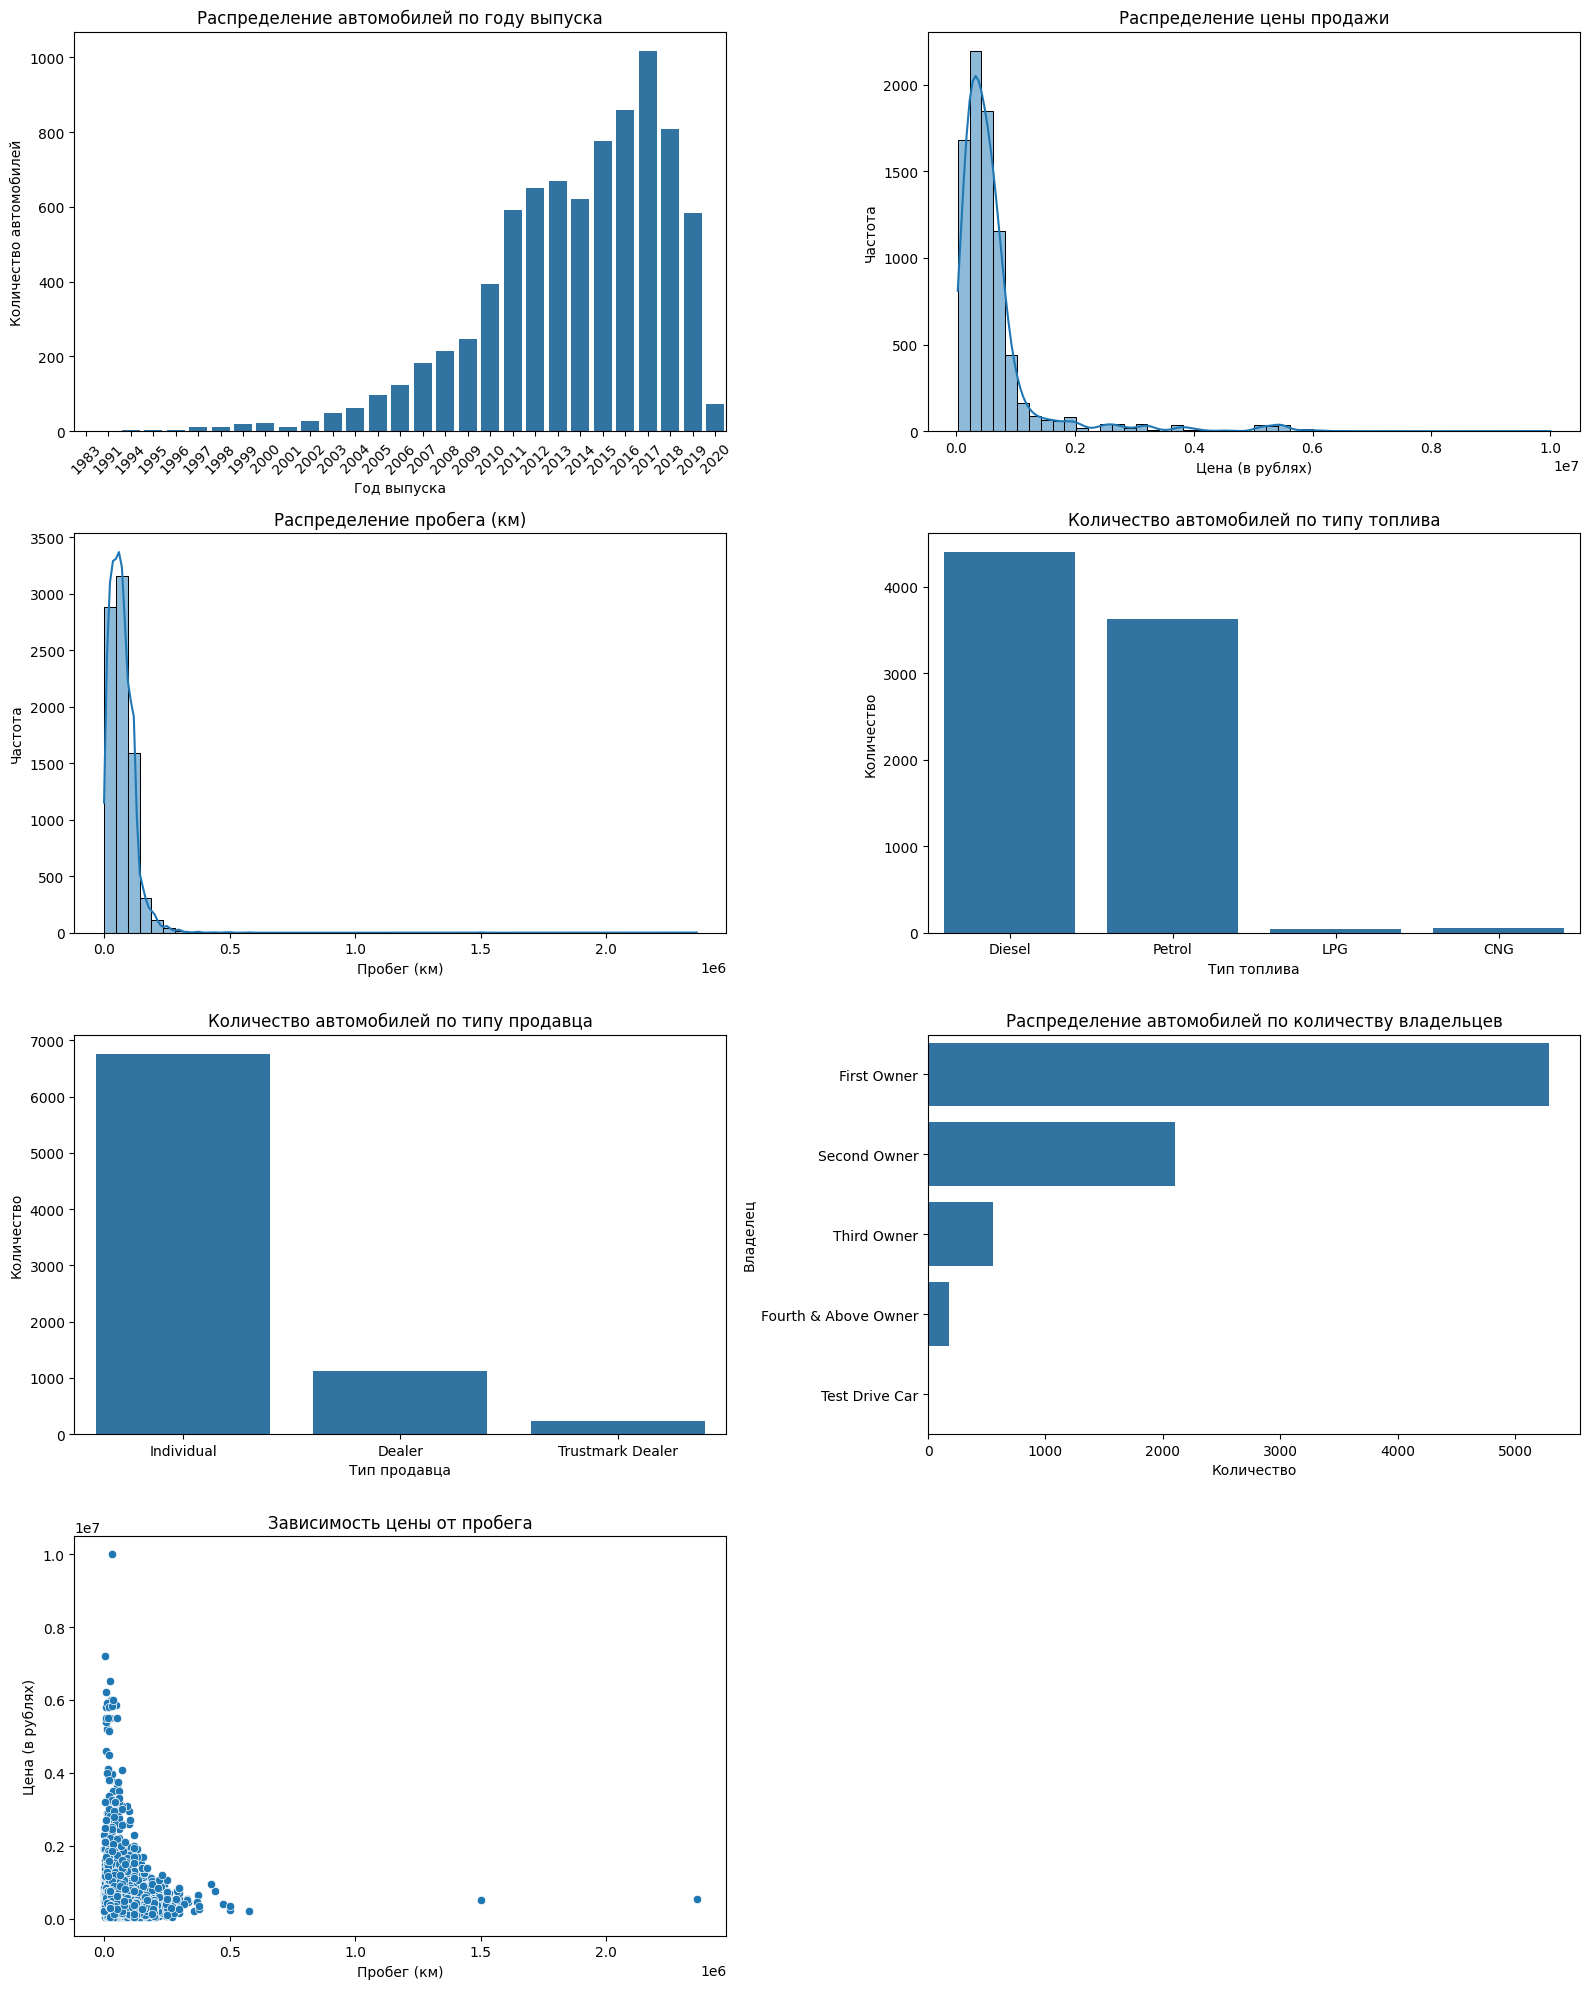

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем фигуру и оси для подграфиков
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()  # для удобства индексирования

# 1. Распределение года выпуска
sns.countplot(x='year', data=df, ax=axes[0])
axes[0].set_title('Распределение автомобилей по году выпуска')
axes[0].set_xlabel('Год выпуска')
axes[0].set_ylabel('Количество автомобилей')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# 2. Распределение цены продажи
sns.histplot(df['selling_price'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Распределение цены продажи')
axes[1].set_xlabel('Цена (в рублях)')
axes[1].set_ylabel('Частота')

# 3. Распределение пробега
sns.histplot(df['km_driven'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Распределение пробега (км)')
axes[2].set_xlabel('Пробег (км)')
axes[2].set_ylabel('Частота')

# 4. Количество автомобилей по типу топлива
sns.countplot(x='fuel', data=df, ax=axes[3])
axes[3].set_title('Количество автомобилей по типу топлива')
axes[3].set_xlabel('Тип топлива')
axes[3].set_ylabel('Количество')

# 5. Количество автомобилей по типу продавца
sns.countplot(x='seller_type', data=df, ax=axes[4])
axes[4].set_title('Количество автомобилей по типу продавца')
axes[4].set_xlabel('Тип продавца')
axes[4].set_ylabel('Количество')

# 6. Распределение автомобилей по количеству владельцев
sns.countplot(y='owner', data=df, order=df['owner'].value_counts().index, ax=axes[5])
axes[5].set_title('Распределение автомобилей по количеству владельцев')
axes[5].set_xlabel('Количество')
axes[5].set_ylabel('Владелец')

# 7. Диаграмма рассеяния цена vs пробег
sns.scatterplot(x='km_driven', y='selling_price', data=df, ax=axes[6])
axes[6].set_title('Зависимость цены от пробега')
axes[6].set_xlabel('Пробег (км)')
axes[6].set_ylabel('Цена (в рублях)')

# 8. Оставляем пустым или можно добавить что-то свое
axes[7].axis('off')

plt.tight_layout()
plt.show()


Обработка пропущенных значений 

In [32]:
# Проверка на наличе пропущенных значений
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [33]:
df.drop(['mileage', 'engine', 'max_power', 'torque', 'seats',], axis=1, inplace=True)
df.to_csv('data.csv', index=False)


In [34]:
import pandas as pd 
# Загрузка данных
df = pd.read_csv('data.csv')
#print(df.head())
miss = df.isnull().sum()
# Удаление строки с пропущенным значением
df = df.dropna()
print(miss)


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


Преобразования категориальных признаков

In [35]:
# Вывод уникальных значений для каждого столбца
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Уникальные значения в столбце '{column}': {unique_values}")

Уникальные значения в столбце 'name': ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Уникальные значения в столбце 'year': [2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]
Уникальные значения в столбце 'selling_price': [  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000    70000   730000   650000   330000
   366000  1149000   425000  2100000   925000   675000   819999   390000
  1500000   700000  1450000  1090000   850000  1650000  1750000  1590000
  1689999  1425000   265000   190000   630000   540000   448000   745000
  1025

In [36]:
# Преобразование категориальных признаков в числовые 
# Список со названиями столбцов для преобразования
columns_to_encode = ['seller_type', 'transmission', 'owner', 'fuel']

# Преобразование только указанных столбцов
for column in columns_to_encode:
    df[column], unique_indices = pd.factorize(df[column])
    print(f"Уникальные значения в столбце '{column}': {unique_indices}")
    print(f"Преобразованный столбец '{column}': {df[column]}")
    print() 

# Выведите окончательный DataFrame
print("Окончательный DataFrame:")
print(df)

Уникальные значения в столбце 'seller_type': Index(['Individual', 'Dealer', 'Trustmark Dealer'], dtype='object')
Преобразованный столбец 'seller_type': 0       0
1       0
2       0
3       0
4       0
       ..
8123    0
8124    0
8125    0
8126    0
8127    0
Name: seller_type, Length: 8128, dtype: int64

Уникальные значения в столбце 'transmission': Index(['Manual', 'Automatic'], dtype='object')
Преобразованный столбец 'transmission': 0       0
1       0
2       0
3       0
4       0
       ..
8123    0
8124    0
8125    0
8126    0
8127    0
Name: transmission, Length: 8128, dtype: int64

Уникальные значения в столбце 'owner': Index(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner',
       'Test Drive Car'],
      dtype='object')
Преобразованный столбец 'owner': 0       0
1       1
2       2
3       0
4       0
       ..
8123    0
8124    3
8125    0
8126    0
8127    0
Name: owner, Length: 8128, dtype: int64

Уникальные значения в столбце 'fuel': Index(['Diesel

Обработка выбросов

In [37]:
'''import seaborn as sns
import matplotlib.pyplot as plt

# Функция для удаления выбросов
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Визуализация выбросов до удаления
plt.figure(figsize=(15, 5))

for i, column in enumerate(['selling_price', 'km_driven', 'year'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Выбросы в {column} до удаления')
    
plt.tight_layout()
plt.show()

# Обработка выбросов в нескольких столбцах
for column in ['selling_price', 'km_driven', 'year']:
    df = remove_outliers_iqr(df, column)

# Визуализация выбросов после удаления
plt.figure(figsize=(15, 5))

for i, column in enumerate(['selling_price', 'km_driven', 'year'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Выбросы в {column} после удаления')

plt.tight_layout()
plt.show()'''


"import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Функция для удаления выбросов\ndef remove_outliers_iqr(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n\n# Визуализация выбросов до удаления\nplt.figure(figsize=(15, 5))\n\nfor i, column in enumerate(['selling_price', 'km_driven', 'year'], 1):\n    plt.subplot(1, 3, i)\n    sns.boxplot(y=df[column])\n    plt.title(f'Выбросы в {column} до удаления')\n\nplt.tight_layout()\nplt.show()\n\n# Обработка выбросов в нескольких столбцах\nfor column in ['selling_price', 'km_driven', 'year']:\n    df = remove_outliers_iqr(df, column)\n\n# Визуализация выбросов после удаления\nplt.figure(figsize=(15, 5))\n\nfor i, column in enumerate(['selling_price', 'km_driven', 'year'], 1):\n    plt.subplot(1, 3, i)\n    sns.boxplot(y=df[column])\n    plt.t

In [38]:
'''Пробразования даты'''
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Преобразование года в возраст
df['age'] = 2025 - df['year']
df.drop('year', axis=1, inplace=True)

# Инициализация MinMaxScaler
scaler = MinMaxScaler()

# Нормализация возраста
df['scaled_age'] = scaler.fit_transform(df[['age']])

df = df.drop(columns='age')
# Вывод результата
print(df)



                              name  selling_price  km_driven  fuel  \
0           Maruti Swift Dzire VDI         450000     145500     0   
1     Skoda Rapid 1.5 TDI Ambition         370000     120000     0   
2         Honda City 2017-2020 EXi         158000     140000     1   
3        Hyundai i20 Sportz Diesel         225000     127000     0   
4           Maruti Swift VXI BSIII         130000     120000     1   
...                            ...            ...        ...   ...   
8123             Hyundai i20 Magna         320000     110000     1   
8124         Hyundai Verna CRDi SX         135000     119000     0   
8125        Maruti Swift Dzire ZDi         382000     120000     0   
8126               Tata Indigo CR4         290000      25000     0   
8127               Tata Indigo CR4         290000      25000     0   

      seller_type  transmission  owner  scaled_age  
0               0             0      0    0.162162  
1               0             0      1    0.162162  


In [52]:
print(df.head())

                           name  fuel  seller_type  transmission  owner  \
0        Maruti Swift Dzire VDI     0            0             0      0   
1  Skoda Rapid 1.5 TDI Ambition     0            0             0      1   
2      Honda City 2017-2020 EXi     1            0             0      2   
3     Hyundai i20 Sportz Diesel     0            0             0      0   
4        Maruti Swift VXI BSIII     1            0             0      0   

   scaled_age  log_selling_price  log_km_driven  
0    0.162162          13.017005      11.887938  
1    0.162162          12.821261      11.695255  
2    0.378378          11.970357      11.849405  
3    0.270270          12.323860      11.751950  
4    0.351351          11.775297      11.695255  


Преобразование числовых признаков

       selling_price     km_driven
count   8.128000e+03  8.128000e+03
mean    6.382718e+05  6.981951e+04
std     8.062534e+05  5.655055e+04
min     2.999900e+04  1.000000e+00
25%     2.549990e+05  3.500000e+04
50%     4.500000e+05  6.000000e+04
75%     6.750000e+05  9.800000e+04
max     1.000000e+07  2.360457e+06


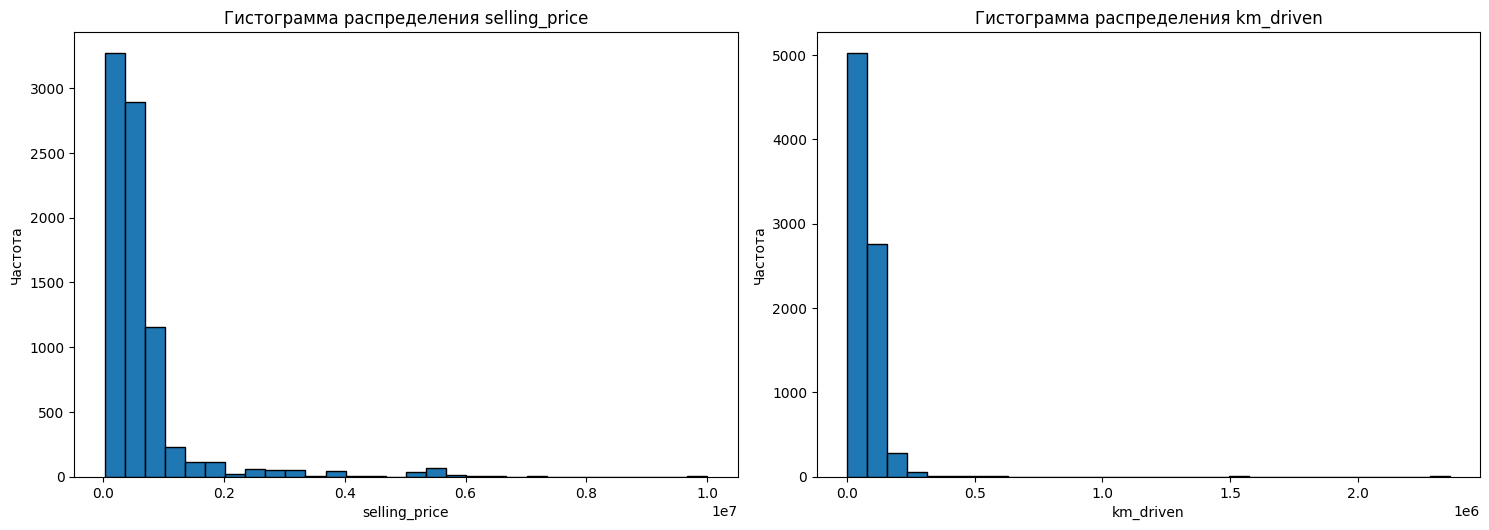

C:\Users\Sablin-aa.BIRYUSA\AppData\Local\Temp\ipykernel_5996\1095671720.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
C:\Users\Sablin-aa.BIRYUSA\AppData\Local\Temp\ipykernel_5996\1095671720.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


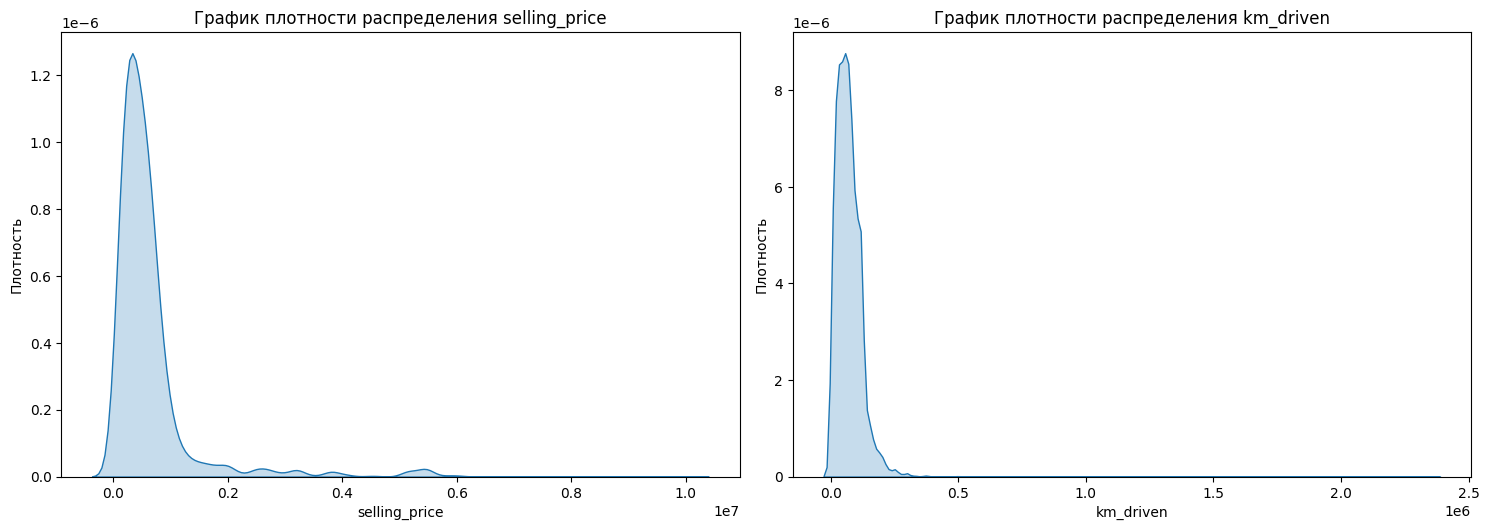

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Определите столбцы для анализа
columns_to_describe = ['selling_price', 'km_driven']  # Укажите нужные столбцы

# Получите описательные статистики для нескольких столбцов
print(df[columns_to_describe].describe())

# Визуализируйте распределение для нескольких столбцов

# Гистограммы
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_describe):
    plt.subplot(2, 2, i + 1)  # Создайте 2х2 сетку
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Гистограмма распределения {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# Графики плотности
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_describe):
    plt.subplot(2, 2, i + 1)  
    sns.kdeplot(df[column], shade=True)
    plt.title(f'График плотности распределения {column}')
    plt.xlabel(column)
    plt.ylabel('Плотность')
plt.tight_layout()
plt.show()


Так как из диаграм видно, что у нас распредление далеко от нормального будем использовать лгорифмичское преобразование

       log_selling_price  log_km_driven
count        8128.000000    8128.000000
mean           12.973412      10.860210
std             0.839131       0.874511
min            10.308953       0.693147
25%            12.449019      10.463132
50%            13.017005      11.002117
75%            13.422469      11.492733
max            16.118096      14.674366


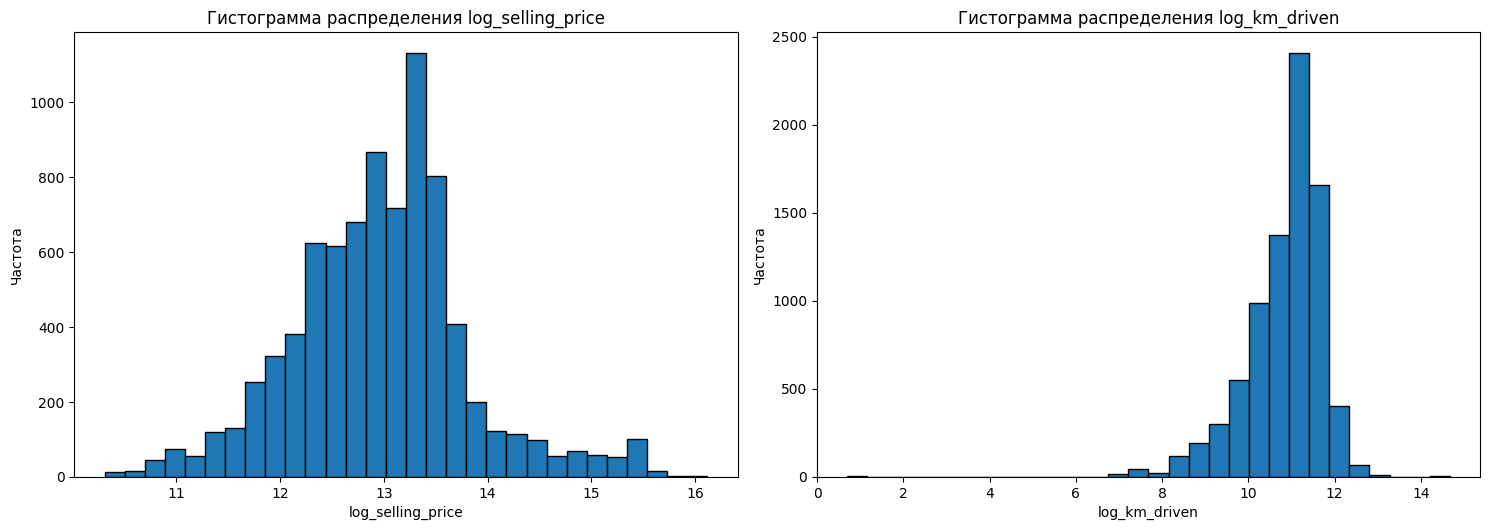

C:\Users\Sablin-aa.BIRYUSA\AppData\Local\Temp\ipykernel_5996\526638916.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
C:\Users\Sablin-aa.BIRYUSA\AppData\Local\Temp\ipykernel_5996\526638916.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


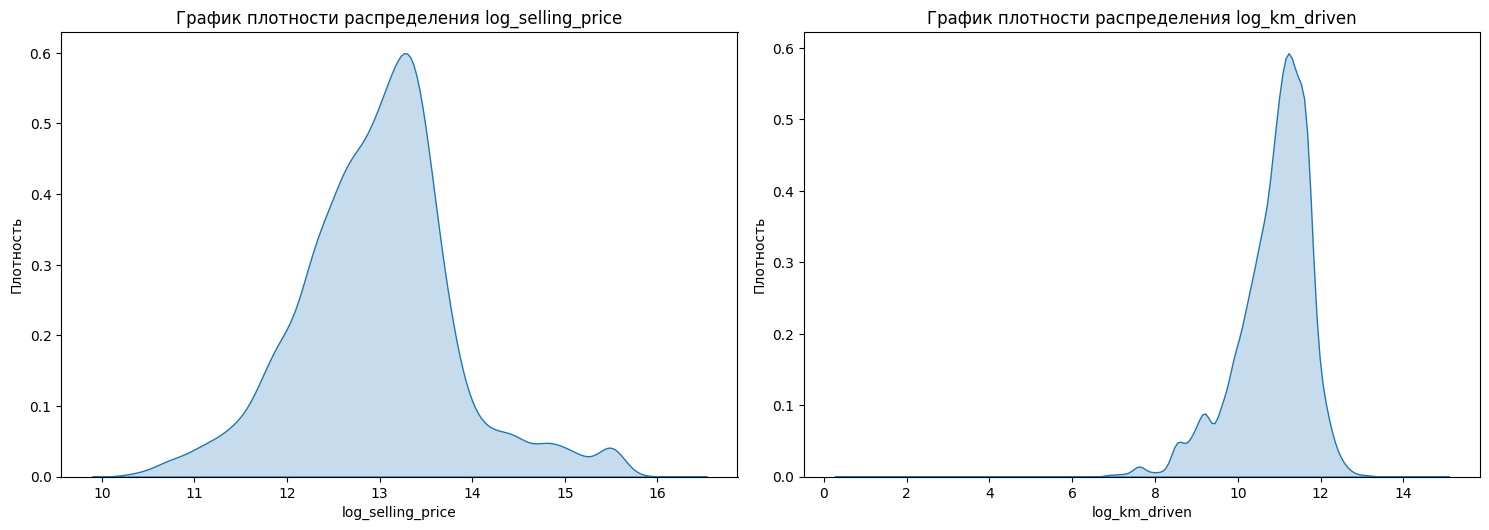

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Применение логарифмическое преобразование к выбранным столбцам
df['log_selling_price'] = np.log1p(df['selling_price'])  # Логарифм selling_price
df['log_km_driven'] = np.log1p(df['km_driven'])          # Логарифм km_driven

# Определите столбцы для анализа
columns_to_describe = ['log_selling_price', 'log_km_driven']  

# Получение описательной статистики для нескольких столбцов
print(df[columns_to_describe].describe())

# Визуализация распределение для нескольких столбцов

# Гистограммы
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_describe):
    plt.subplot(2, 2, i + 1)  # Создайте 2х2 сетку
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Гистограмма распределения {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# Графики плотности
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_describe):
    plt.subplot(2, 2, i + 1)  
    sns.kdeplot(df[column], shade=True)
    plt.title(f'График плотности распределения {column}')
    plt.xlabel(column)
    plt.ylabel('Плотность')
plt.tight_layout()
plt.show()


In [42]:
columns_to_drop = ['selling_price', 'km_driven']
df = df.drop(columns=columns_to_drop)

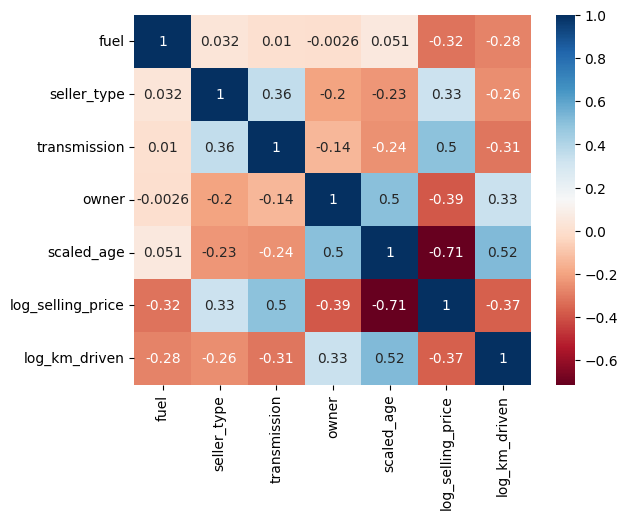

In [43]:
df_heatmap = df.drop(columns='name')
import seaborn as sns
sns.heatmap(df_heatmap.corr(), annot=True, cmap="RdBu")
plt.show()

Создание тестовой и обучающей выборки

In [44]:
from sklearn.model_selection import train_test_split
# Опредление фич
X = df.drop(['name', 'log_selling_price'], axis=1)
# Опредление целвой переменной 
y = df['log_selling_price']
# Разбиение на test и train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error (Train): 0.12487100229302574
Mean Squared Error (Test): 0.1710417025814994
R Squared (Train): 0.8238273211078734
R Squared (Test): 0.750333938963828
CV Score Mean (Train): 0.7651844529338806
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


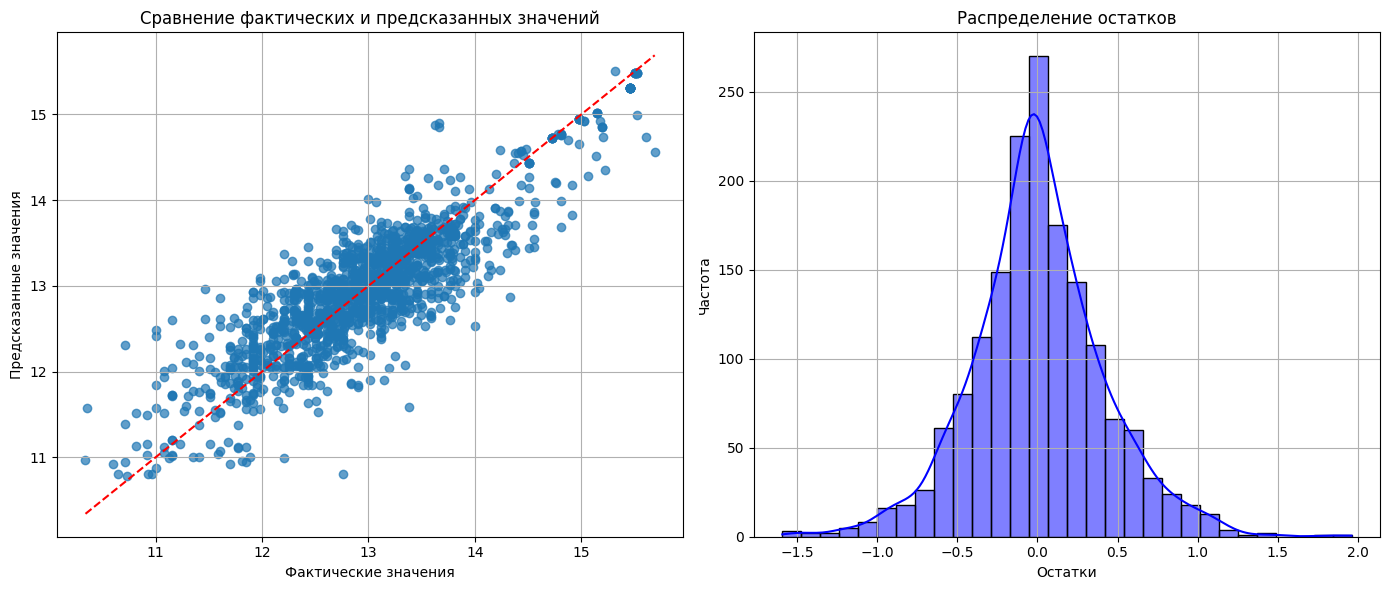

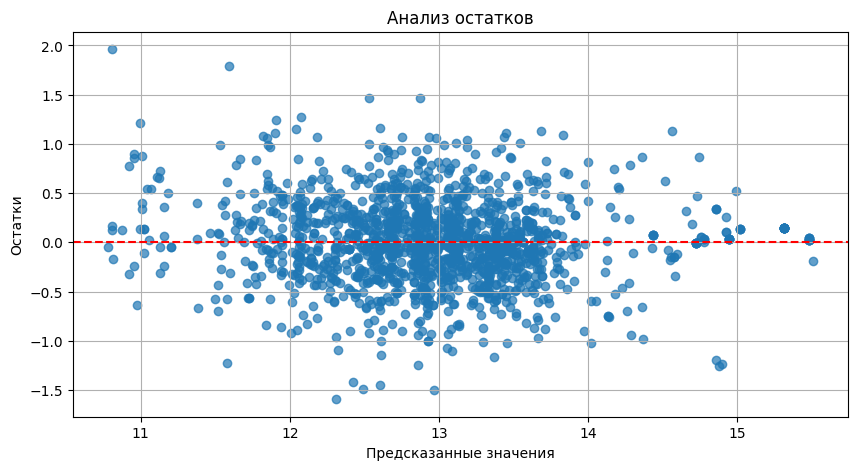

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


# 4. Инициализация и обучение модели градиентного бустинга
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# 5. Прогнозирование на тестовом наборе
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 6. Оценка модели с помощью Mean Squared Error и R Squared
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# 7. Кросс-валидация
cv_scores = cross_val_score(model, X, y, cv=3, scoring='r2')
cv_score_mean = cv_scores.mean()

# 8. Вывод результатов
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'R Squared (Train): {r2_train}')
print(f'R Squared (Test): {r2_test}')
print(f'CV Score Mean (Train): {cv_score_mean}')

# 9. Настройка гиперпараметров (по желанию)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# 10. Вывод наилучших параметров
print(f'Best parameters: {grid_search.best_params_}')


# 1. Сравнение фактических и предсказанных значений
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.grid(True)

# 2. Анализ остатков
residuals = y_test - y_pred_test

plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. График остатков
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Анализ остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid(True)
plt.show()


Mean Squared Error (Train): 0.0744454442002413
Mean Squared Error (Test): 0.18362132900661
R Squared (Train): 0.8949695838486647
R Squared (Test): 0.7319717165849471
CV Score Mean (Train): 0.7369607126494673


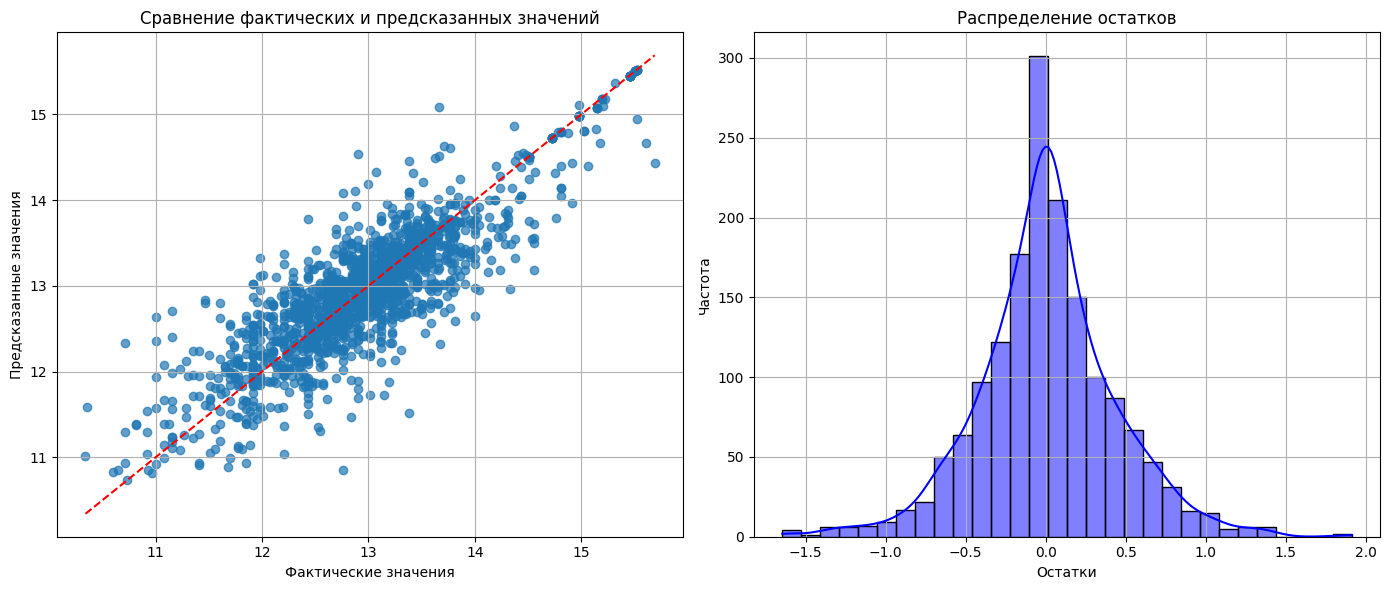

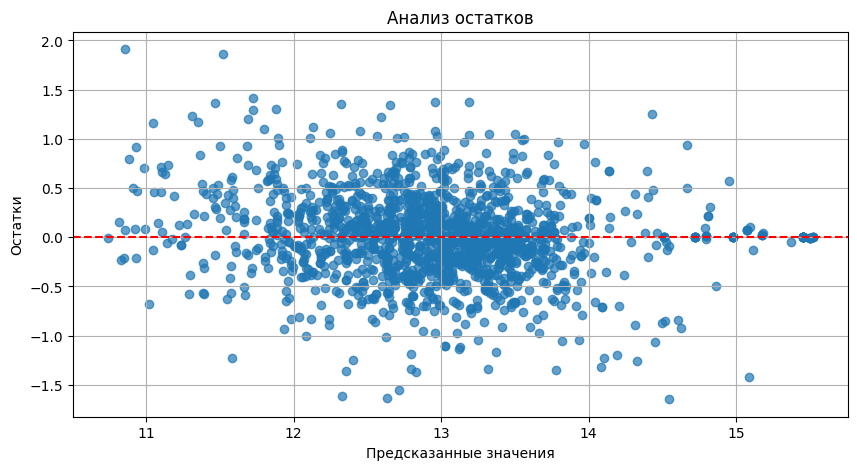

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Инициализация и обучение модели Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Прогнозирование на тестовом наборе
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 6. Оценка модели
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# 7. Кросс-валидация для оценки модели
cv_scores = cross_val_score(model, X, y, cv=3, scoring='r2')
cv_score_mean = cv_scores.mean()

# 8. Вывод результатов
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'R Squared (Train): {r2_train}')
print(f'R Squared (Test): {r2_test}')
print(f'CV Score Mean (Train): {cv_score_mean}')

# 9. Визуализация результатов

# Сравнение фактических и предсказанных значений
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.grid(True)

# Анализ остатков
residuals = y_test - y_pred_test

plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.grid(True)

plt.tight_layout()
plt.show()

# График остатков
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Анализ остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid(True)
plt.show()


Mean Squared Error (Train): 0.2034751920663598
Mean Squared Error (Test): 0.2157728539099532
R Squared (Train): 0.7129295912088414
R Squared (Test): 0.6850407958926717
CV Score Mean (Train): 0.7055519864044596


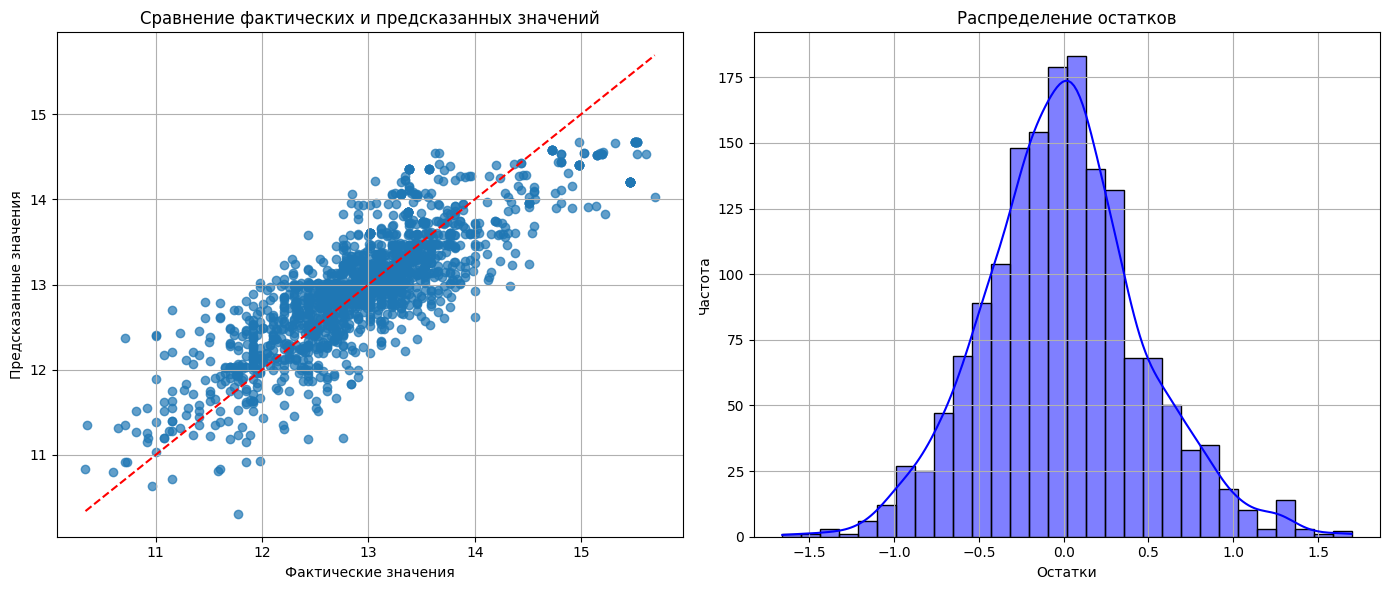

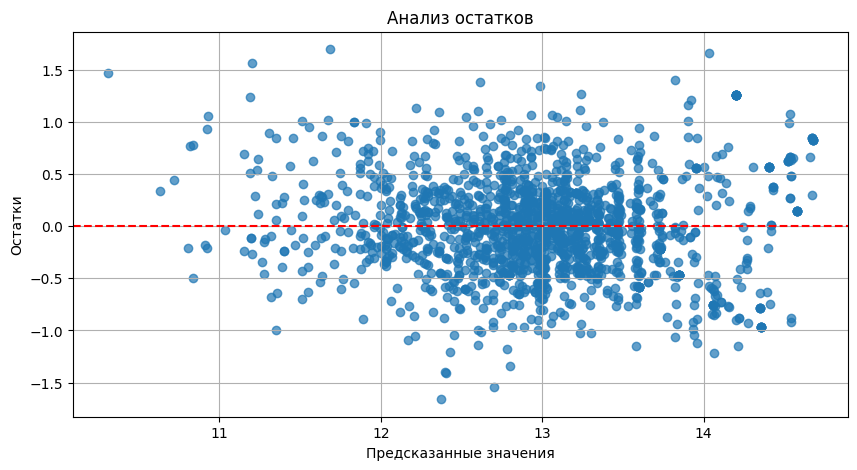

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Прогнозирование на тестовом наборе
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 6. Оценка модели
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# 7. Кросс-валидация для оценки модели
cv_scores = cross_val_score(model, X, y, cv=3, scoring='r2')
cv_score_mean = cv_scores.mean()

# 8. Вывод результатов
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'R Squared (Train): {r2_train}')
print(f'R Squared (Test): {r2_test}')
print(f'CV Score Mean (Train): {cv_score_mean}')

# 9. Визуализация результатов

# Сравнение фактических и предсказанных значений
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.grid(True)

# Анализ остатков
residuals = y_test - y_pred_test

plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.grid(True)

plt.tight_layout()
plt.show()

# График остатков
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Анализ остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid(True)
plt.show()


Mean Squared Error (Train): 0.20353862144454513
Mean Squared Error (Test): 0.2155136628264971
R Squared (Train): 0.7128401026705085
R Squared (Test): 0.6854191317948846
CV Score Mean (Train): 0.7054104124148535


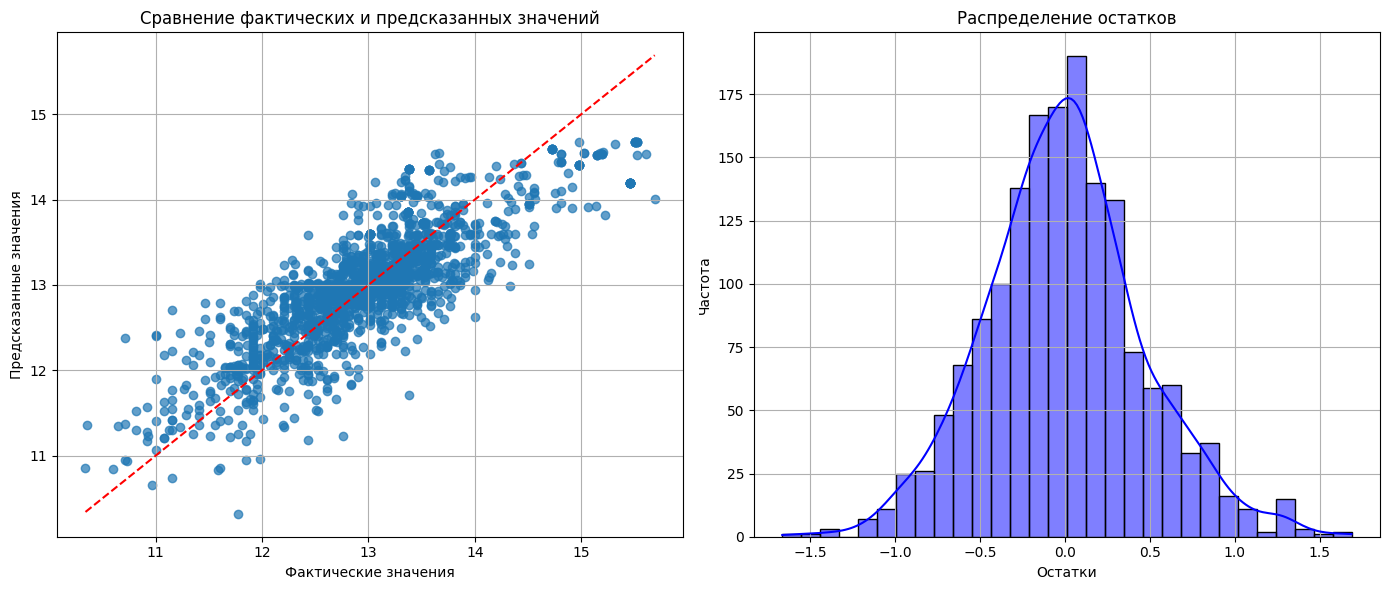

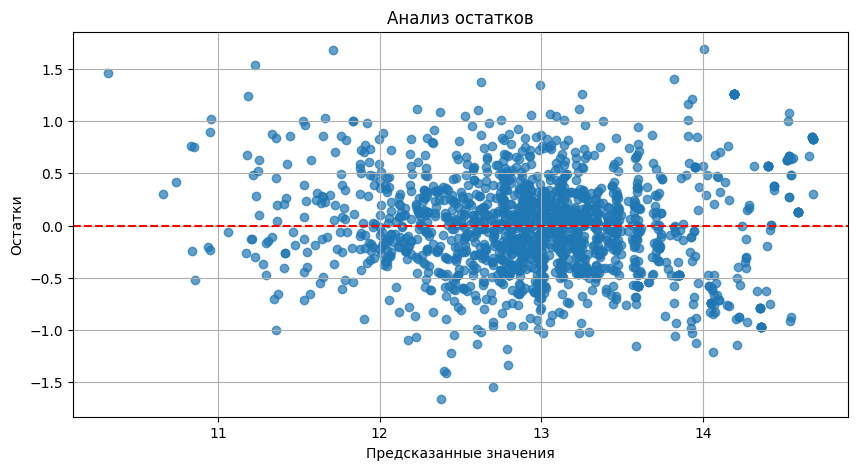

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Инициализация и обучение модели Ridge
alpha_value = 1.0  # Можно менять для регулировки модели
ridge_model = Ridge(alpha=alpha_value, random_state=42)
ridge_model.fit(X_train, y_train)

# 5. Прогнозирование на тестовом наборе
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

# 6. Оценка модели
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# 7. Кросс-валидация для оценки модели
cv_scores = cross_val_score(ridge_model, X, y, cv=3, scoring='r2')
cv_score_mean = cv_scores.mean()

# 8. Вывод результатов
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'R Squared (Train): {r2_train}')
print(f'R Squared (Test): {r2_test}')
print(f'CV Score Mean (Train): {cv_score_mean}')

# 9. Визуализация результатов

# Сравнение фактических и предсказанных значений
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.grid(True)

# Анализ остатков
residuals = y_test - y_pred_test

plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.grid(True)

plt.tight_layout()
plt.show()

# График остатков
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Анализ остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid(True)
plt.show()


Таблица результатов моделей:
               Model       MSE        R2
0            XGBoost  0.171042  0.750334
1      Random Forest  0.183621  0.731972
2  Linear Regression  0.215773  0.685041
3              Ridge  0.215514  0.685419


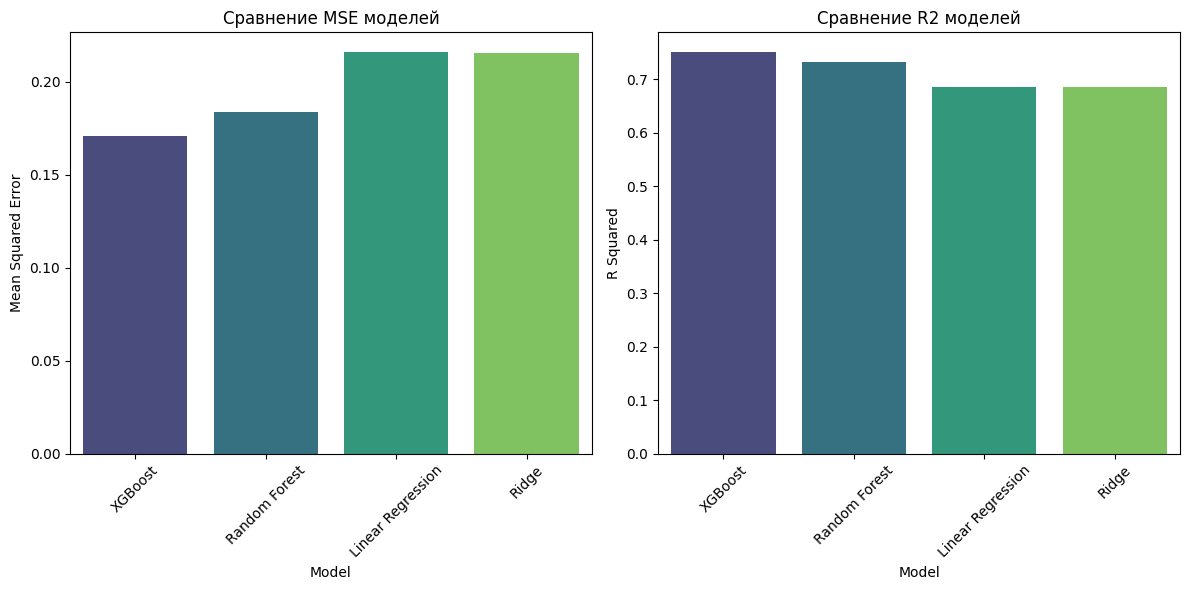

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge

# Словарь для хранения результатов
results = {}

# 1. XGBoost
model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
results['XGBoost'] = {
    'MSE': mean_squared_error(y_test, y_pred_xgb),
    'R2': r2_score(y_test, y_pred_xgb)
}

# 2. Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# 3. Линейная регрессия
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr)
}

# 4. Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
results['Ridge'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2': r2_score(y_test, y_pred_ridge)
}

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.columns = ['Model', 'MSE', 'R2']

# Вывод таблицы с результатами
print("Таблица результатов моделей:")
print(results_df)

# Визуализация результатов
plt.figure(figsize=(12, 6))

# График MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis', hue='Model', legend=False)
plt.title('Сравнение MSE моделей')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# График R2
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2', data=results_df, palette='viridis', hue='Model', legend=False)
plt.title('Сравнение R2 моделей')
plt.ylabel('R Squared')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
